In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
from tensorflow.keras.utils import to_categorical # 분류분석 시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 머신러닝/딥러닝 : 데이터의 법칙성을 추출
- 다양한 분야에서 응용 : 글씨인식, 문장분류, 질병진단, ...
※ML / DL의 종류
- 지도학습(독립 = 입력변수와 종속=타겟=출력변수가 모두 주어졌을 경우)
     회귀분석(타겟변수가 연속형) vs 분류분석(multi, binary)
- 비지도학습(입력변수만)
    군집화
- 강화학습

※ 지도학습에서의 ML, DL 프로그래밍 방식
1. 데이터 셋 확보(input=입력변수, target=종속변수)
    원본 데이터 및 시뮬레이션을 통해 데이터 생성
2. 전처리
    스케일 조정
    훈련셋(학습셋), 검증셋, 시험셋(테스트셋)
    학습 및 평가 가능한 포맷으로 변환
3. 모델 구성
    Sequential 객체 생성 뒤 필요한 층을 add()함수로 추가
4. 모델 학습과정 설정
    compile()함수 이용 - 손실함수, optimizer, metrics(평가지표)
5. 모델 학습 (ft. 학습과정 지켜보기)
    fit()함수 이용 - 훈련셋입력=독립변수, 훈련셋타겟=종속변수, 학습횟수, 검증셋

# 1. 데이터 셋 생성

# 2. 데이터 전처리

In [3]:
# 학습데이터 = 훈련데이터
x_train = np.array([1,2,3,4,5,6,7,8,9]*10)
y_train = np.array([2,4,6,8,10,12,14,16,18]*10)
# 검증데이터
x_val = np.array([1,2,3,4,5,6,7,8,9])
y_val = np.array([2,4,6,8,10,12,14,16,18])
# 테스트셋 = 시험데이터
x_test = np.array([1,2,3,4,5,6,7,8,9])
y_test = np.array([2,4,6,8,10,12,14,16,18])
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((90,), (9,), (9,), (90,), (9,), (9,))

In [4]:
# 인코딩 종류
data = np.array(['a', 'b', 'c', 'd'])
print('원 데이터 : ', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(data)
# labeled_data = le.transform(data)
labeled_data = le.fit_transform(data)
print('라벨인코딩된 데이터 : ', labeled_data)
one_hot_encoded_data = to_categorical(labeled_data)
print('원핫인코딩된 데이터 : ', one_hot_encoded_data)

원 데이터 :  ['a' 'b' 'c' 'd']
라벨인코딩된 데이터 :  [0 1 2 3]
원핫인코딩된 데이터 :  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# 분류분석을 위해 target을 원핫인코딩(라벨링 전환)
data = np.array([1,2,2,4,2])
print(data)
categorical_one_hot = to_categorical(data)
print('to_categorical을 이용한 원핫인코딩 : \n', categorical_one_hot)
import pandas as pd
get_dummies_one_hot = pd.get_dummies(data)
display('get_dummies를 이용한 원핫인코딩 : ', get_dummies_one_hot)
print(type(get_dummies_one_hot))

[1 2 2 4 2]
to_categorical을 이용한 원핫인코딩 : 
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


'get_dummies를 이용한 원핫인코딩 : '

,1,2,4
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


<class 'pandas.core.frame.DataFrame'>


In [6]:
# 분류분석을 위한 target변수 라벨링 전환(=원핫인코딩)
Y_train = to_categorical(y_train, 19)
Y_val   = to_categorical(y_val)
Y_test  = to_categorical(y_test)
Y_test

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

In [7]:
print('훈련셋 구조 : ', x_train.shape, Y_train.shape) # 독립변수 1개, 타겟변수 19개
print('검증셋 구조 : ', x_val.shape, Y_val.shape)
print('테스트셋 구조 : ', x_test.shape, Y_test.shape)

훈련셋 구조 :  (90,) (90, 19)
검증셋 구조 :  (9,) (9, 19)
테스트셋 구조 :  (9,) (9, 19)


# 3. 모델 구성하기

In [8]:
model = Sequential()
model.add(Input(shape=(1, ))) # 입력층
model.add(Dense(units=38, activation='sigmoid')) # units 출력수, sigmoid 활성화 함수(relu, tanh)
model.add(Dense(units=64, activation='elu'))
model.add(Dense(units=32, activation='elu'))
model.add(Dense(units=19, activation='softmax'))
# softmax : 모든 출력결과의 합이 1. 분류분석 마지막 layer(출력층)에서 activation으로
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정

In [9]:
model.compile(loss="categorical_crossentropy", # 분류분석에서의 손실함수(원핫인코딩有)
             optimizer="sgd",
             metrics=['accuracy']) # 평가지표 : accuracy

# 5. 모델 학습

In [10]:
hist = model.fit(x_train, Y_train,
                epochs=300,
                batch_size=10,
                verbose=2, # 학습결과 출력 옵션 0:출력없음, 1:기본값, 2:에포크별 로그 상세출력
                validation_data=(x_val, Y_val)
                )

Epoch 1/300
9/9 - 0s - loss: 3.0369 - accuracy: 0.0778 - val_loss: 2.9103 - val_accuracy: 0.1111 - 457ms/epoch - 51ms/step
Epoch 2/300
9/9 - 0s - loss: 2.8658 - accuracy: 0.0444 - val_loss: 2.7752 - val_accuracy: 0.1111 - 25ms/epoch - 3ms/step
Epoch 3/300
9/9 - 0s - loss: 2.7501 - accuracy: 0.1111 - val_loss: 2.6795 - val_accuracy: 0.1111 - 24ms/epoch - 3ms/step
Epoch 4/300
9/9 - 0s - loss: 2.6580 - accuracy: 0.0778 - val_loss: 2.6064 - val_accuracy: 0.0000e+00 - 25ms/epoch - 3ms/step
Epoch 5/300
9/9 - 0s - loss: 2.5900 - accuracy: 0.0000e+00 - val_loss: 2.5476 - val_accuracy: 0.0000e+00 - 23ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.5430 - accuracy: 0.0333 - val_loss: 2.4980 - val_accuracy: 0.1111 - 26ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.4954 - accuracy: 0.0889 - val_loss: 2.4557 - val_accuracy: 0.1111 - 24ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 2.4531 - accuracy: 0.1111 - val_loss: 2.4183 - val_accuracy: 0.1111 - 24ms/epoch - 3ms/step
Epoch 9/300
9/9 - 

Epoch 69/300
9/9 - 0s - loss: 1.6424 - accuracy: 0.3222 - val_loss: 1.6031 - val_accuracy: 0.4444 - 23ms/epoch - 3ms/step
Epoch 70/300
9/9 - 0s - loss: 1.6310 - accuracy: 0.3556 - val_loss: 1.5927 - val_accuracy: 0.3333 - 24ms/epoch - 3ms/step
Epoch 71/300
9/9 - 0s - loss: 1.6089 - accuracy: 0.3667 - val_loss: 1.5801 - val_accuracy: 0.5556 - 23ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 1.6007 - accuracy: 0.3889 - val_loss: 1.5694 - val_accuracy: 0.5556 - 24ms/epoch - 3ms/step
Epoch 73/300
9/9 - 0s - loss: 1.5893 - accuracy: 0.4444 - val_loss: 1.5588 - val_accuracy: 0.5556 - 24ms/epoch - 3ms/step
Epoch 74/300
9/9 - 0s - loss: 1.5770 - accuracy: 0.4333 - val_loss: 1.5489 - val_accuracy: 0.4444 - 23ms/epoch - 3ms/step
Epoch 75/300
9/9 - 0s - loss: 1.5756 - accuracy: 0.4444 - val_loss: 1.5378 - val_accuracy: 0.3333 - 25ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 1.5511 - accuracy: 0.3667 - val_loss: 1.5269 - val_accuracy: 0.4444 - 24ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 1.0815 - accuracy: 0.7889 - val_loss: 1.0552 - val_accuracy: 0.8889 - 24ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 1.0766 - accuracy: 0.7778 - val_loss: 1.0502 - val_accuracy: 0.6667 - 25ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 1.0731 - accuracy: 0.7111 - val_loss: 1.0435 - val_accuracy: 0.8889 - 25ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 1.0755 - accuracy: 0.7111 - val_loss: 1.0383 - val_accuracy: 0.7778 - 26ms/epoch - 3ms/step
Epoch 140/300
9/9 - 0s - loss: 1.0659 - accuracy: 0.7444 - val_loss: 1.0331 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 141/300
9/9 - 0s - loss: 1.0539 - accuracy: 0.8222 - val_loss: 1.0281 - val_accuracy: 0.7778 - 24ms/epoch - 3ms/step
Epoch 142/300
9/9 - 0s - loss: 1.0504 - accuracy: 0.7667 - val_loss: 1.0223 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 143/300
9/9 - 0s - loss: 1.0599 - accuracy: 0.8000 - val_loss: 1.0185 - val_accuracy: 0.8889 - 24ms/epoch - 3ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.7793 - accuracy: 0.8444 - val_loss: 0.7569 - val_accuracy: 1.0000 - 24ms/epoch - 3ms/step
Epoch 204/300
9/9 - 0s - loss: 0.7827 - accuracy: 0.8778 - val_loss: 0.7468 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.7823 - accuracy: 0.8111 - val_loss: 0.7452 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.7697 - accuracy: 0.7667 - val_loss: 0.7530 - val_accuracy: 0.8889 - 24ms/epoch - 3ms/step
Epoch 207/300
9/9 - 0s - loss: 0.7829 - accuracy: 0.8444 - val_loss: 0.7392 - val_accuracy: 1.0000 - 23ms/epoch - 3ms/step
Epoch 208/300
9/9 - 0s - loss: 0.7558 - accuracy: 0.8667 - val_loss: 0.7451 - val_accuracy: 0.8889 - 24ms/epoch - 3ms/step
Epoch 209/300
9/9 - 0s - loss: 0.7688 - accuracy: 0.8889 - val_loss: 0.7299 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.7629 - accuracy: 0.7778 - val_loss: 0.7341 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.5705 - accuracy: 0.9444 - val_loss: 0.5462 - val_accuracy: 0.8889 - 23ms/epoch - 3ms/step
Epoch 271/300
9/9 - 0s - loss: 0.5613 - accuracy: 0.8889 - val_loss: 0.5585 - val_accuracy: 0.8889 - 24ms/epoch - 3ms/step
Epoch 272/300
9/9 - 0s - loss: 0.5618 - accuracy: 0.8556 - val_loss: 0.5397 - val_accuracy: 1.0000 - 24ms/epoch - 3ms/step
Epoch 273/300
9/9 - 0s - loss: 0.5854 - accuracy: 0.9111 - val_loss: 0.5602 - val_accuracy: 0.8889 - 26ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.5534 - accuracy: 0.9444 - val_loss: 0.5520 - val_accuracy: 0.8889 - 26ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.5616 - accuracy: 0.8889 - val_loss: 0.5340 - val_accuracy: 0.8889 - 24ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.5697 - accuracy: 0.8778 - val_loss: 0.5226 - val_accuracy: 1.0000 - 24ms/epoch - 3ms/step
Epoch 277/300
9/9 - 0s - loss: 0.5518 - accuracy: 0.9222 - val_loss: 0.5279 - val_accuracy: 1.0000 - 23ms/epoch - 3ms/step
Epoch 278/300
9/

# 6. 모델 평가하기(모델 학습과정 살펴보고 evalute)

In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

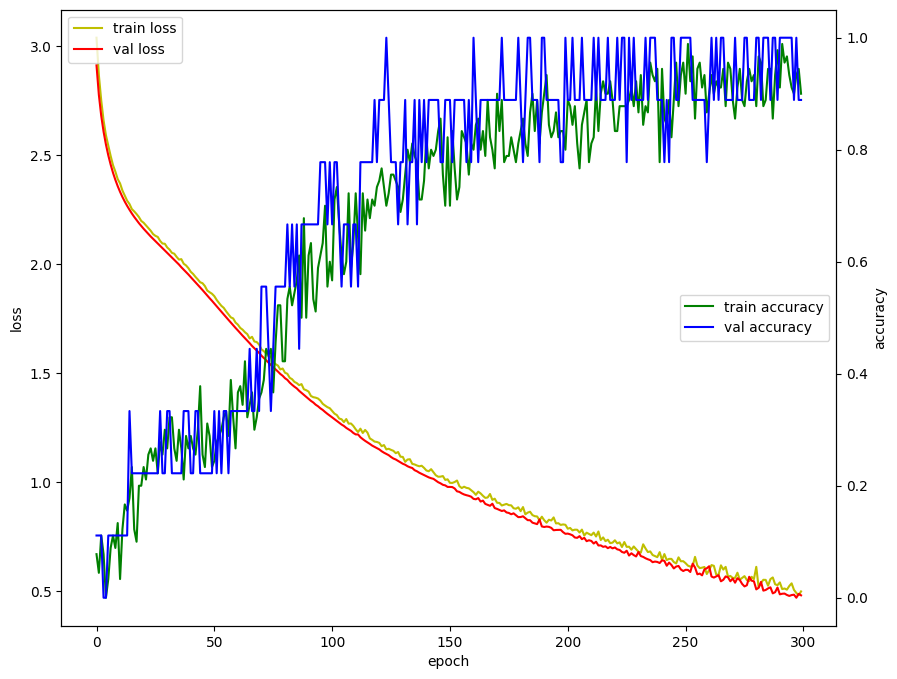

In [12]:
# 모델 학습과정 시각화
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10, 8))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label = 'val accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='center right')
plt.show()

In [13]:
# 모델 평가
score = model.evaluate(x_test, Y_test, batch_size=1)

9/9 [==============================] - 0s 881us/step - loss: 0.4818 - accuracy: 0.8889


In [14]:
score # loss, accuracy

[0.48177024722099304, 0.8888888955116272]

In [15]:
print('평가된 loss : ', score[0])
print('평가된 accuracy : ', score[1]*100, '%')

평가된 loss :  0.48177024722099304
평가된 accuracy :  88.88888955116272 %


# 7. 모델 사용

In [16]:
H = model.predict(np.array([[2]]))
H

1/1 [==============================] - 0s 71ms/step


array([[3.4452608e-13, 1.3571646e-12, 9.3483418e-02, 6.5119554e-10,
        7.7880007e-01, 1.9203857e-11, 1.2623866e-01, 2.3008173e-11,
        1.4756585e-03, 3.3425401e-11, 2.1432274e-06, 9.9178706e-13,
        1.6119213e-09, 2.0560003e-09, 9.2581962e-14, 5.1095742e-11,
        9.2733357e-19, 3.0042433e-12, 9.7363721e-26]], dtype=float32)

In [17]:
# 분류분석의 예측은 predict() 함수 후 argmax()
model.predict(np.array([[2]])).argmax()

1/1 [==============================] - 0s 14ms/step


4

In [18]:
# 4를 몇% 확률로 예측했는지 파악
H[0, H.argmax()]*100

77.88000702857971

# 7. 모델 저장하기

In [19]:
# model.save('model/02_deep.h5')
from tensorflow.keras.models import save_model
save_model(model, 'model/02_deep.h5')

## 저장된 모델 사용하기

In [20]:
from tensorflow.keras.models import load_model
model2 = load_model('model/02_deep.h5')